In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [7]:
data =np.loadtxt('datasets/university_admission.txt', delimiter=',')
x = data[:, 0:2]
y = data[:, 2]

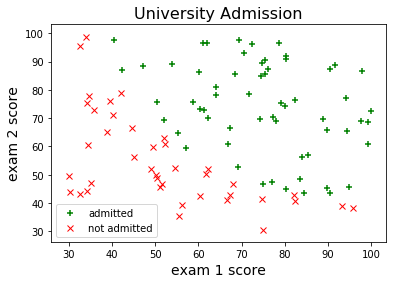

In [8]:
fig, ax = plt.subplots()
positives = np.where(y == 1)
negatives = np.where(y == 0)
ax.scatter(x[positives, 0], x[positives, 1], marker="+", c='green')
ax.scatter(x[negatives, 0], x[negatives, 1], marker="x", c='red', linewidth=1)
plt.title("University Admission", fontsize=16)
plt.xlabel("exam 1 score", fontsize=14)
plt.ylabel("exam 2 score", fontsize=14)
plt.legend(["admitted", "not admitted"])
plt.show()

We have a clear understanding of what sort of model we're looking to build from this dataset. The basic idea is that high scores in both exams make it very likely for a candidate to be selected. Let us see how we can capture this idea using a logistic regression model

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def cost(theta, X, y):
    predictions = sigmoid(X @ theta)
    predictions[predictions == 1] = 0.999 # log(1)=0 causes division error during optimization
    error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions);
    return sum(error) / len(y);

In [12]:
def cost_gradient(theta, X, y):
    predictions = sigmoid(X @ theta);
    return X.transpose() @ (predictions - y) / len(y)

Now we can start training the model 

In [9]:
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x

In [13]:
initial_theta = np.zeros(X.shape[1]) # set initial model parameters to zero
theta = opt.fmin_cg(cost, initial_theta, cost_gradient, (X, y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 46
         Function evaluations: 109
         Gradient evaluations: 109


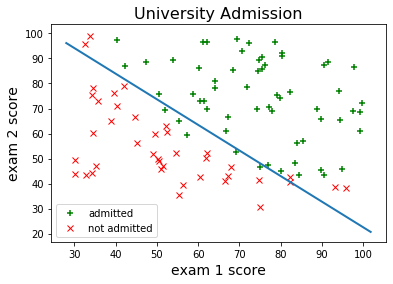

In [14]:
x_axis = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
y_axis = (-1 / theta[2]) * (theta[1] * x_axis + theta[0])
ax.plot(x_axis, y_axis, linewidth=2)
fig

In [15]:
predictions = np.zeros(len(y))
predictions[sigmoid(X @ theta) >= 0.5] = 1
print("Training Accuracy =", str(np.mean(predictions == y) * 100) + "%")

Training Accuracy = 89.0%


In [16]:
probability = sigmoid(np.array([1, 45, 85]) @ theta)
print("For a student with scores 45 and 85, we predict an admission probability of", probability)

For a student with scores 45 and 85, we predict an admission probability of 0.7762911086515806
